In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import re
import plotly.express as px

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/SriLankaTweets.csv")
data.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1546235784730230785,1546089912042127362,1.657486e+12,2022-07-10 20:51:53,0,NaN,@MrJonasDanner Das geht doch seit Beginn der B...,de,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MrJonasDanner', 'name': 'Jon...",NaN,NaN,NaN,NaN
1,1,1546235779906781186,1546235779906781186,1.657486e+12,2022-07-10 20:51:52,0,NaN,Artículo lúcido y bien informado sobre la cris...,es,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,1546235777633468416,1546235777633468416,1.657486e+12,2022-07-10 20:51:51,0,NaN,En argentina y después de lo de Sri Lanka la g...,es,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1546235770582847496,1546185673593524225,1.657486e+12,2022-07-10 20:51:50,0,NaN,@Haqeeqat_TV Ab na daro aur sikho in Sri lank...,hi,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Haqeeqat_TV', 'name': 'Haqee...",NaN,NaN,NaN,NaN
4,4,1546235754342498308,1546235754342498308,1.657486e+12,2022-07-10 20:51:46,0,NaN,Resigned or Arrested? 1. Sri Lanka's presiden...,et,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10004 non-null  int64  
 1   id               10004 non-null  int64  
 2   conversation_id  10004 non-null  int64  
 3   created_at       10004 non-null  float64
 4   date             10004 non-null  object 
 5   timezone         10004 non-null  int64  
 6   place            7 non-null      object 
 7   tweet            10004 non-null  object 
 8   language         10004 non-null  object 
 9   hashtags         10004 non-null  object 
 10  cashtags         10004 non-null  object 
 11  user_id          10004 non-null  int64  
 12  user_id_str      10004 non-null  int64  
 13  username         10004 non-null  object 
 14  name             10004 non-null  object 
 15  day              10004 non-null  int64  
 16  hour             10004 non-null  int64  
 17  link        

In [6]:
df = pd.DataFrame()
df['tweet'] = data['tweet'].astype('string')
df['username'] = data['username'].astype('string')
df['name'] = data['name'].astype('string')
df['search'] = data['search'].astype('string')
df['retweet'] = data['retweet'].astype('string')

In [7]:
df.head()

,tweet,username,name,search,retweet
0,@MrJonasDanner Das geht doch seit Beginn der B...,USchoeneberg,Uwe Schoeneberg,srilanka,False
1,Artículo lúcido y bien informado sobre la cris...,markos_gamboa,B+,srilanka,False
2,En argentina y después de lo de Sri Lanka la g...,davidtrujillopo,David Trujillo,srilanka,False
3,@Haqeeqat_TV Ab na daro aur sikho in Sri lank...,ba_kids,Overseas Pakistani🇵🇰 not a Bot,srilanka,False
4,Resigned or Arrested? 1. Sri Lanka's presiden...,Ion09595469,Ony,srilanka,False


In [8]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [10]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [11]:
df.tweet = df.tweet.apply(lambda x: preprocess(x))

In [12]:
df.username = df.username.apply(lambda x: preprocess(x))

In [13]:
df.name = df.name.apply(lambda x: preprocess(x))

In [16]:
sia = SentimentIntensityAnalyzer()
def get_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"

In [17]:
df['sentiment'] = df['tweet'].apply(lambda x: get_sentiment(x))

<AxesSubplot:ylabel='sentiment'>

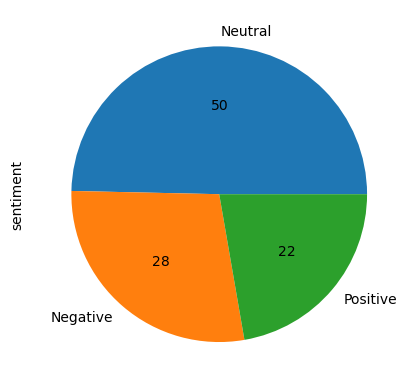

In [18]:
df['sentiment'].value_counts().plot(kind='pie',autopct='%1.f')

### 50 % of the tweets are Netural , 28 % of the tweers are Negative and 22 % of the tweets are Positive